#### California Housing Price Prediction

**DESCRIPTION**

**Background of Problem Statement:**

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

**Problem Objective:**

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

**Domain: Finance and Housing**

**Analysis Tasks to be performed:**

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

#### 1. Load the data :

- Read the “housing.csv” file from the folder into the program.
- Print first few rows of this data.

In [1]:
# Import Libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from math import sqrt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel("ERROR")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
housing_df = pd.read_csv("C:/Users/Nkululeko Cyril Cele/source/Machine-Learning/housing.csv")

In [3]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
housing_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
housing_df.shape

(20640, 10)

In [7]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [8]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### 2. Handle missing values :
Fill the missing values with the mean of the respective column.

In [10]:
# Checking for duplicated rows
housing_df.duplicated().sum()

0

In [11]:
# Handling missing values
housing_df.isnull().values.sum()

207

In [12]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [13]:
#summary statistics for missing values
print ("The mean for the total_bedrooms column is: " + str(housing_df["total_bedrooms"].mean()) + "\n")
print("Below are the summary statistics for the total_bedrooms column.\n")
print(housing_df["total_bedrooms"].describe())

The mean for the total_bedrooms column is: 537.8705525375618

Below are the summary statistics for the total_bedrooms column.

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


In [14]:
# Imputing the missing values
from sklearn.impute import SimpleImputer

In [15]:
imp = SimpleImputer(missing_values = np.nan, strategy = "mean")
imp.fit(housing_df.iloc[:, 4:5])
housing_df.iloc[:, 4:5] = imp.transform(housing_df.iloc[:, 4:5])
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

#### Detecting the Outliers
Below I will detect the outliers and count how many we can remove. However, I will not remove them since the project does not specify what to do with the outliers.

In [16]:
class Boundaries:
    def __init__(self, dataset, column):
        self.dataset = dataset
        self.column = column

    def column_1(self):
        self.column = "total_rooms"
        des = self.dataset[self.column].describe()
        desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
        Q1 = des[desPairs['25']]
        Q3 = des[desPairs['75']]
        IQR = Q3-Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        return f"The upper boundary is {upper} and the lower boundary is {lower}."

    def column_2(self):
        self.column = "total_bedrooms"
        des = self.dataset[self.column].describe()
        desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
        Q1 = des[desPairs['25']]
        Q3 = des[desPairs['75']]
        IQR = Q3-Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        return f"The upper boundary is {upper} and the lower boundary is {lower}."
    
    def column_3(self):
        self.column = "population"
        des = self.dataset[self.column].describe()
        desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
        Q1 = des[desPairs['25']]
        Q3 = des[desPairs['75']]
        IQR = Q3-Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        return f"The upper boundary is {upper} and the lower boundary is {lower}."
    
    def column_4(self):
        self.column = "households"
        des = self.dataset[self.column].describe()
        desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
        Q1 = des[desPairs['25']]
        Q3 = des[desPairs['75']]
        IQR = Q3-Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        return f"The upper boundary is {upper} and the lower boundary is {lower}."
    
    def column_5(self):
        self.column = "median_income"
        des = self.dataset[self.column].describe()
        desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
        Q1 = des[desPairs['25']]
        Q3 = des[desPairs['75']]
        IQR = Q3-Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        return f"The upper boundary is {upper} and the lower boundary is {lower}."
    
    def column_6(self):
        self.column = "median_house_value"
        des = self.dataset[self.column].describe()
        desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
        Q1 = des[desPairs['25']]
        Q3 = des[desPairs['75']]
        IQR = Q3-Q1
        lower = Q1-1.5*IQR
        upper = Q3+1.5*IQR
        return f"The upper boundary is {upper} and the lower boundary is {lower}."

In [17]:
p = Boundaries(housing_df, housing_df.total_rooms)
q = Boundaries(housing_df, housing_df.total_bedrooms)
r = Boundaries(housing_df, housing_df.population)
s = Boundaries(housing_df, housing_df.households)
t = Boundaries(housing_df, housing_df.median_income)
u = Boundaries(housing_df, housing_df.median_house_value)

In [18]:
print("Total Rooms:", p.column_1())
print("Total Bedrooms:", q.column_2())
print("Population:", r.column_3())
print("Households:", s.column_4())
print("Median Income:", t.column_5())
print("Median House Value:", u.column_6())

Total Rooms: The upper boundary is 5698.375 and the lower boundary is -1102.625.
Total Bedrooms: The upper boundary is 1162.625 and the lower boundary is -222.375.
Population: The upper boundary is 3132.0 and the lower boundary is -620.0.
Households: The upper boundary is 1092.5 and the lower boundary is -207.5.
Median Income: The upper boundary is 8.013024999999999 and the lower boundary is -0.7063750000000004.
Median House Value: The upper boundary is 482412.5 and the lower boundary is -98087.5.


In [19]:
print("The total number of outliers that can be removed is:",
      len(housing_df[housing_df.total_rooms > 5698.375]) +
      len(housing_df[housing_df.total_bedrooms > 1046.5]) +
      len(housing_df[housing_df.population > 2828.5]) +
      len(housing_df[housing_df.households > 984.5]) +
      len(housing_df[housing_df.median_income > 7.8805]) +
      len(housing_df[housing_df.median_house_value > 479100.0]))
print("This is about", ((len(housing_df[housing_df.total_rooms > 5698.375]) +
      len(housing_df[housing_df.total_bedrooms > 1046.5]) +
      len(housing_df[housing_df.population > 2828.5]) +
      len(housing_df[housing_df.households > 984.5]) +
      len(housing_df[housing_df.median_income > 7.8805]) +
      len(housing_df[housing_df.median_house_value > 479100.0])) / 20640) * 100, "% of the dataset.")

The total number of outliers that can be removed is: 7969
This is about 38.609496124031004 % of the dataset.


#### 3. Encode categorical data :
Convert categorical column in the dataset to numerical data.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
housing_df["ocean_proximity"] = le.fit_transform(housing_df["ocean_proximity"])

#### 4. Standardize data :
Standardize training and test datasets.

In [22]:
# Extracting column names
colnames = housing_df.columns

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(housing_df)
scaled_df = pd.DataFrame(scaled_df, columns = colnames)
scaled_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,1.291089,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.291089,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.291089,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.291089,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.291089,1.172900


I will now visualise the outliers we calculated above

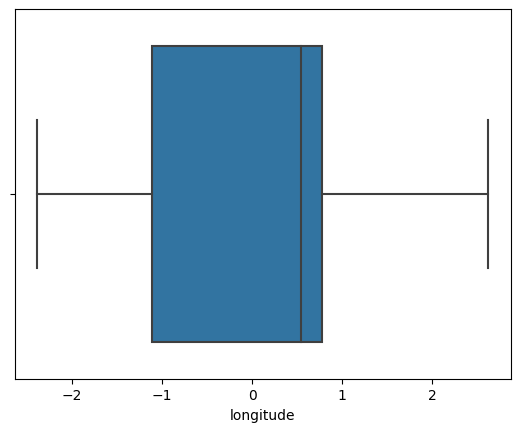

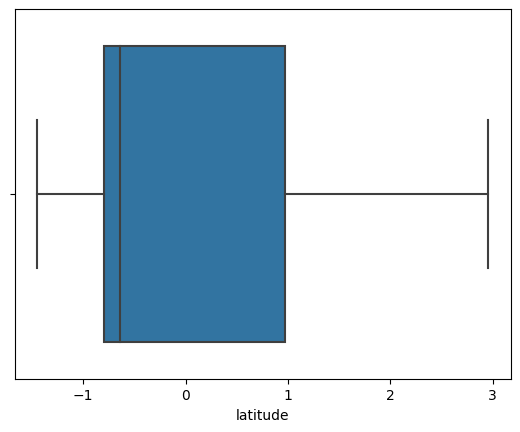

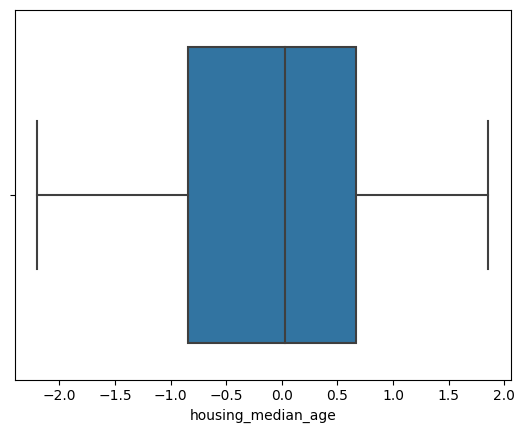

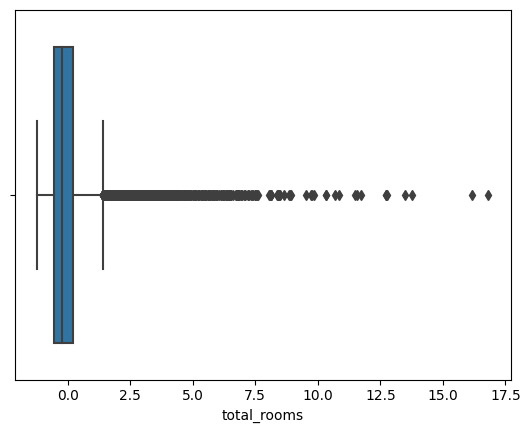

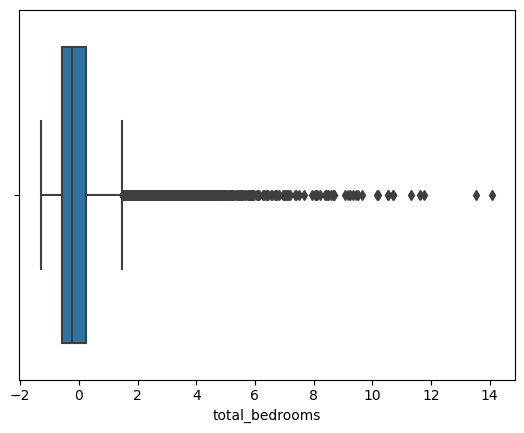

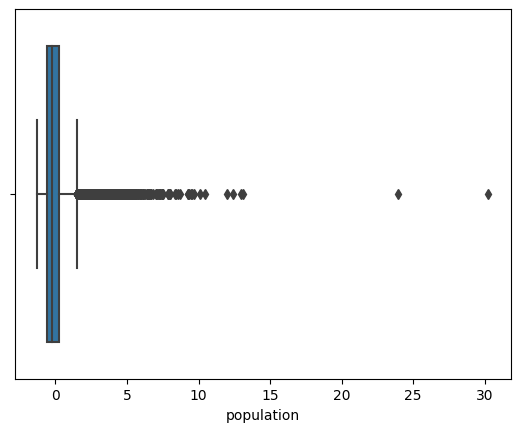

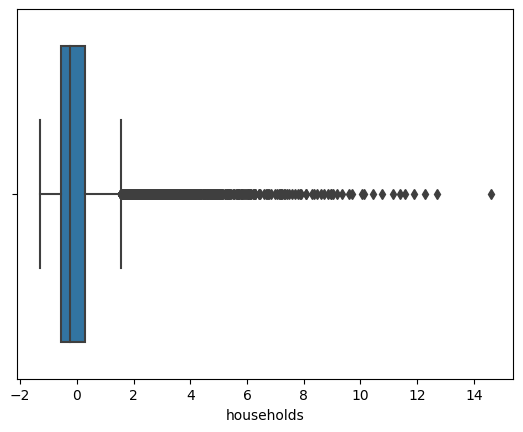

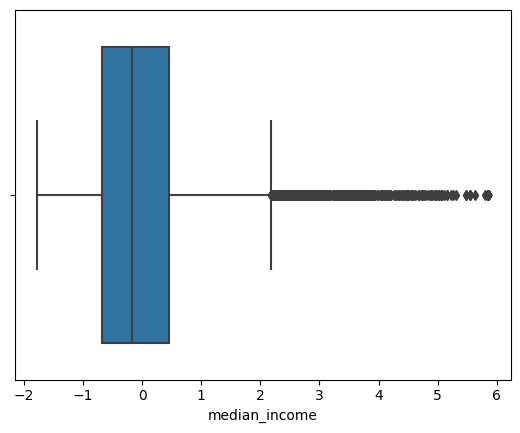

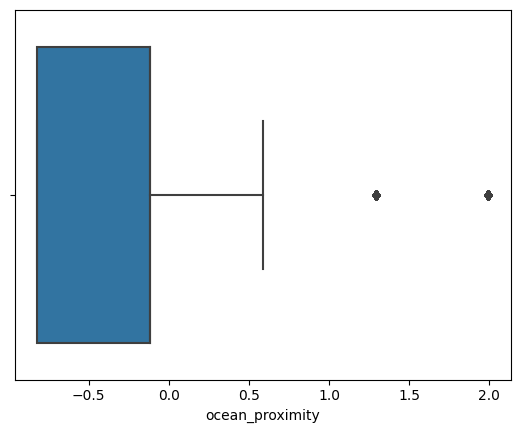

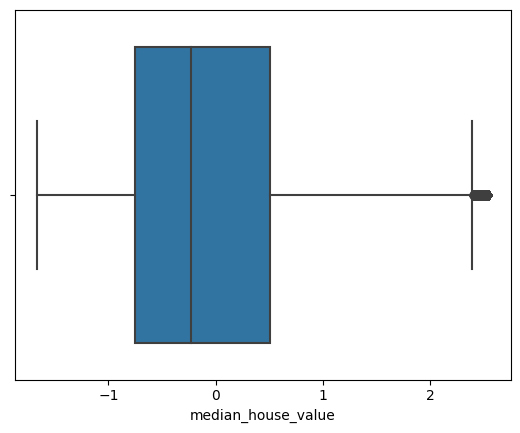

In [25]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'ocean_proximity'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

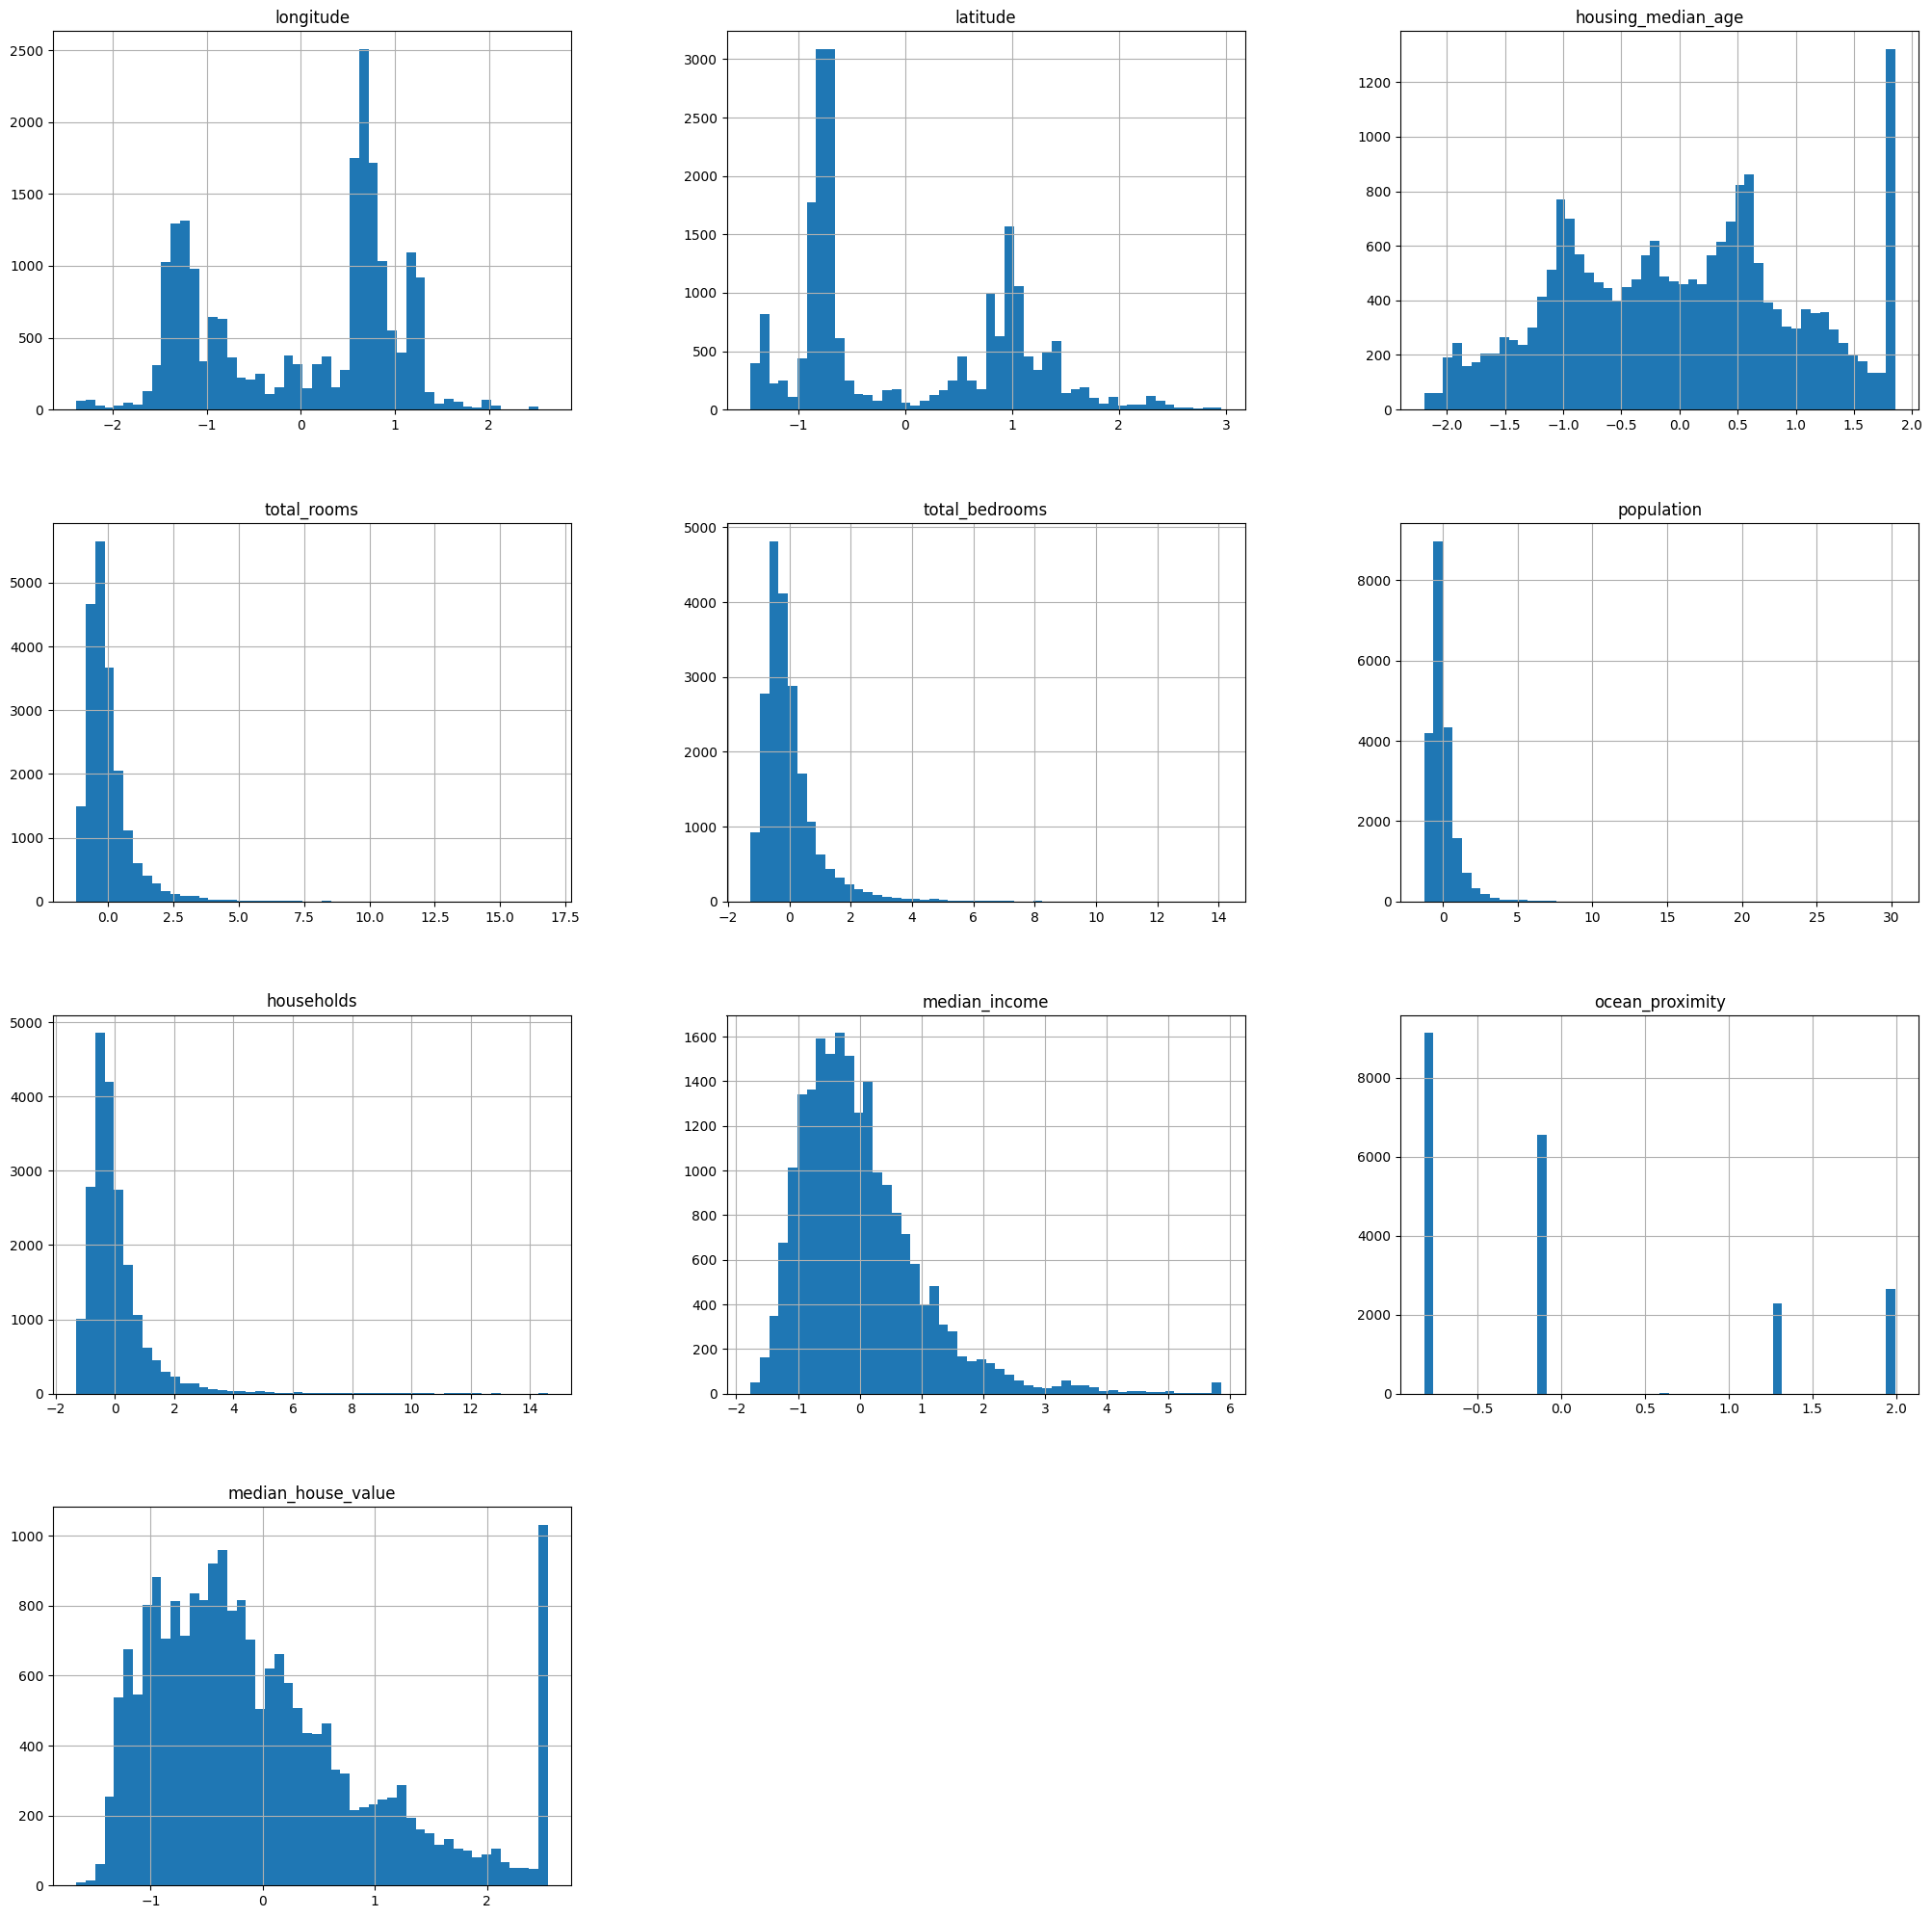

In [26]:
# Displaying distributions
scaled_df.hist(figsize=(25,25),bins=50)

#### 5. visualize relationship between features and target

<AxesSubplot:>

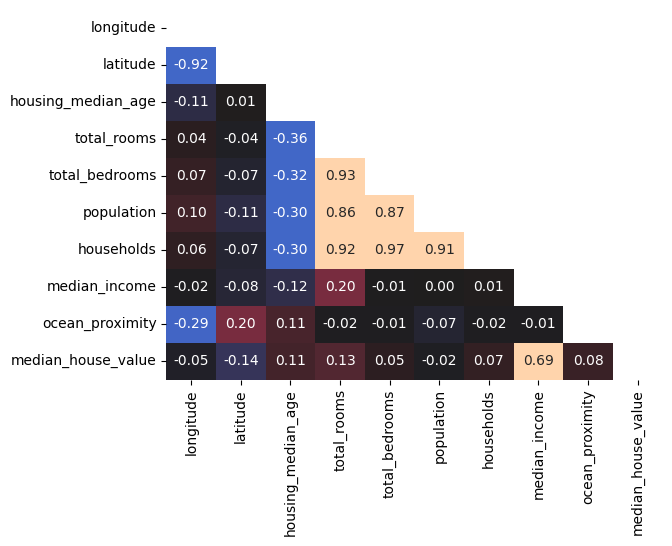

In [27]:
# Looking at correlations
sns.heatmap(scaled_df.corr(), vmin = -0.3, vmax = 0.6, center = 0, annot = True, fmt = ".2f",
            mask = ~np.tri(scaled_df.corr().shape[1], k = -1, dtype = bool), cbar = False)

#### Insight:
Our target is **median_house_value** and it only exhibits a slightly strong correlation with **median_income**. Our target has no correlation with the rest of the features.

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

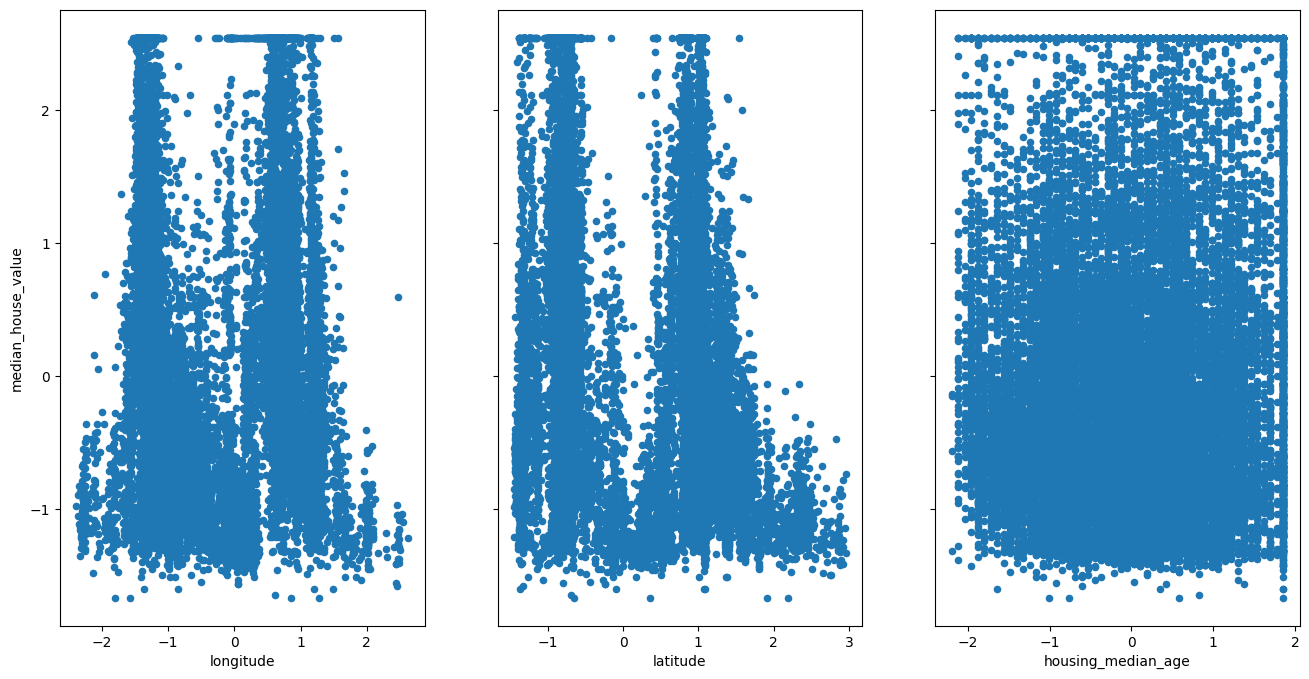

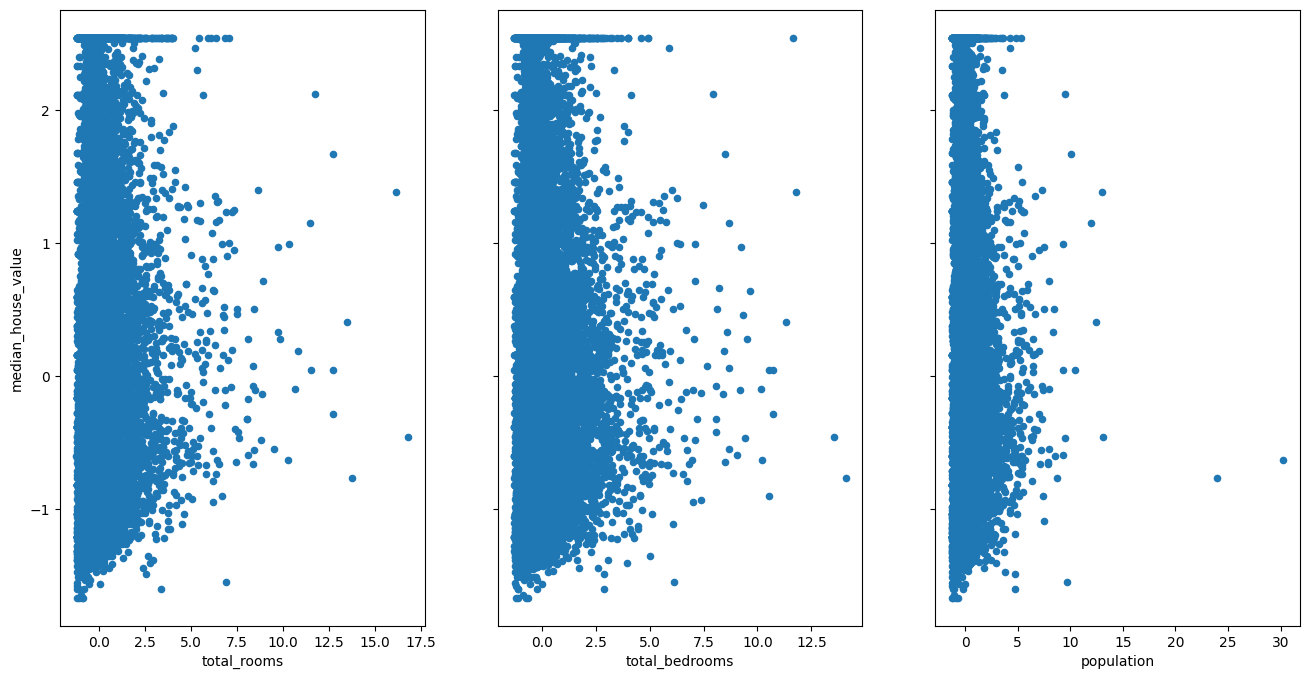

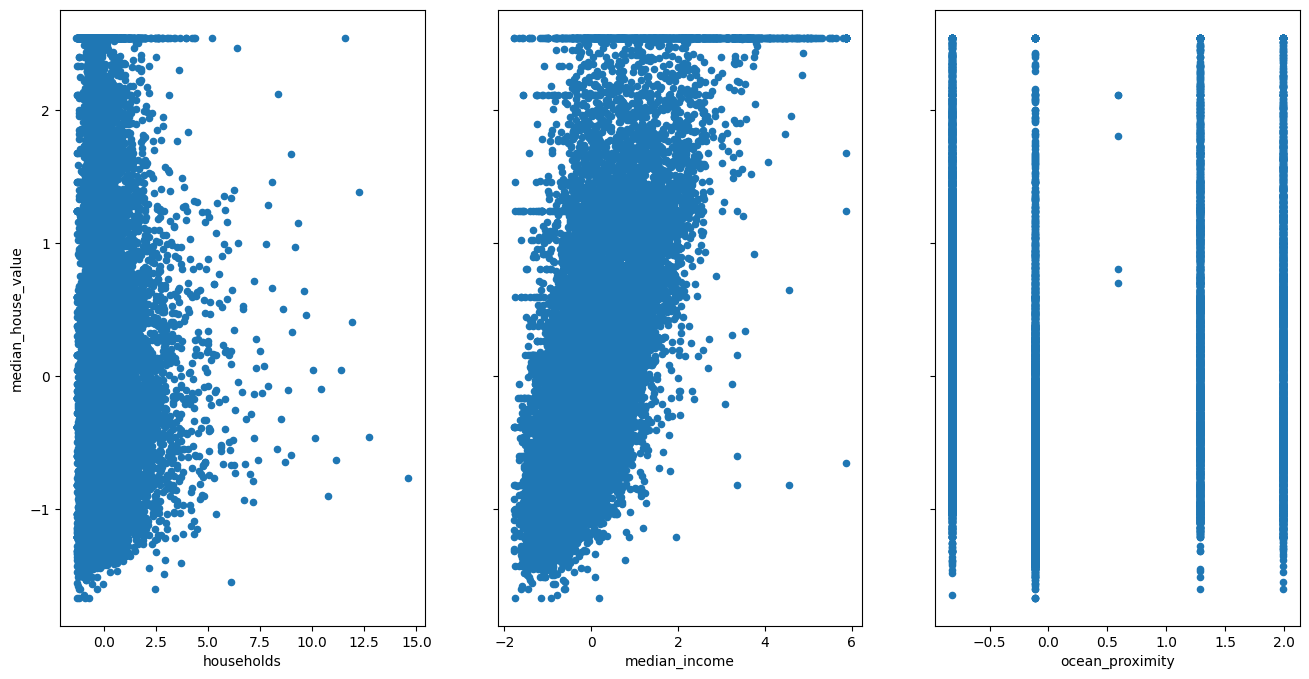

In [28]:
# Let's visualise these

fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='longitude',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='latitude',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='housing_median_age',y='median_house_value',ax=axs[2],figsize=(16,8))

fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='total_rooms',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='total_bedrooms',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='population',y='median_house_value',ax=axs[2],figsize=(16,8))

fig,axs=plt.subplots(1,3,sharey=True)
scaled_df.plot(kind='scatter',x='households',y='median_house_value',ax=axs[0],figsize=(16,8))
scaled_df.plot(kind='scatter',x='median_income',y='median_house_value',ax=axs[1],figsize=(16,8))
scaled_df.plot(kind='scatter',x='ocean_proximity',y='median_house_value',ax=axs[2],figsize=(16,8))

#### 6. Extract X and Y data :
Extract input (X) and output (Y) data from the dataset.

In [29]:
features = ["longitude", "latitude", "housing_median_age", "total_rooms",
            "total_bedrooms", "population", "households", "median_income",
            "ocean_proximity"]
x_input = scaled_df[features]
y_output = scaled_df["median_house_value"]

In [30]:
print(housing_df.shape)
print(x_input.shape)
print(y_output.shape)

(20640, 10)
(20640, 9)
(20640,)


#### 7. Split the dataset :
Split the data into 80% training dataset and 20% test dataset.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y_output, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16512, 9) (16512,)
(4128, 9) (4128,)


#### 8. Apply Various Algorithms:
- Linear Regression
- Decision Tree Regression
- Random Forest Regression (Ensemble Learning)
- Lasso
- Ridge
- Elastic Net

**Perform Linear Regression:**

- Perform Linear Regression on training data.
- Predict output for test dataset using the fitted model.
- Print root mean squared error (RMSE) and r2 from Linear Regression.

In [33]:
from sklearn import linear_model

In [34]:
reg = linear_model.LinearRegression()
model = reg.fit(x_train, y_train)

In [35]:
pred = model.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
print(sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

0.6161449176084118
0.6142406531011786


#### Perform Decision Tree Regression:
- Perform Decision Tree Regression on training data.
- Predict output for test dataset using the fitted model.
- Print root mean squared error from Decision Tree Regression.

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
decisiontree = DecisionTreeRegressor(random_state = 0)

In [40]:
model = decisiontree.fit(x_train, y_train)

In [41]:
pred = model.predict(x_test)

In [42]:
print(sqrt(mean_squared_error(y_test, pred)))
print(r2_score(y_test, pred))

0.5866998247004822
0.6502299382190797


#### Perform Random Forest Regression:
- Perform Random Forest Regression on training data.
- Predict output for test dataset using the fitted model.
- Print RMSE (root mean squared error) from Random Forest Regression.

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

In [45]:
model = randomforest.fit(x_train, y_train)

In [46]:
pred = model.predict(x_test)

In [47]:
print(sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

0.4329182549998507
0.8095580957931462


#### Perform Lasso Regression (determine which variables should be retained in the model):
- Perform Lasso Regression on training data.
- Predict output for test dataset using the fitted model.
- Print RMSE (root mean squared error) and r2 from Lasso Regression.

In [48]:
from sklearn.linear_model import Lasso

In [49]:
regression = Lasso(alpha=0.001)

In [50]:
model = regression.fit(x_train, y_train)

In [51]:
pred = model.predict(x_test)

In [52]:
print(sqrt(mean_squared_error(y_test, pred)))
print('R2 Value/Coefficient of determination: {}'.format(regression.score(x_test,y_test)))

0.6155763303429771
R2 Value/Coefficient of determination: 0.6149522929828486


#### Perform Ridge Regression (addresses multicollinearity issues):
- Perform Ridge Regression on training data.
- Predict output for test dataset using the fitted model.
- Print RMSE (root mean squared error) from Ridge Regression

In [53]:
from sklearn.linear_model import Ridge

In [54]:
regression = Ridge(alpha=0.001)

In [55]:
model = regression.fit(x_train, y_train)

In [56]:
pred = model.predict(x_test)

In [57]:
print(sqrt(mean_squared_error(y_test, pred)))
print('R2 Value/Coefficient of determination: {}'.format(regression.score(x_test, y_test)))

0.6161448857141103
R2 Value/Coefficient of determination: 0.6142406930382915


#### Perform ElasticNet Regression :
- Perform ElasticNet Regression on training data.
- Predict output for test dataset using the fitted model.
- Print RMSE (root mean squared error) from ElasticNet Regression.

In [58]:
from sklearn.linear_model import ElasticNet

In [59]:
elasticreg = ElasticNet(alpha = 0.001)

In [60]:
model = elasticreg.fit(x_train, y_train)

In [61]:
pred = model.predict(x_test)

In [62]:
print(sqrt(mean_squared_error(y_test, pred)))
print('R2 Value/Coefficient of determination: {}'.format(elasticreg.score(x_test,y_test)))

0.6156138553520922
R2 Value/Coefficient of determination: 0.6149053471910753


#### Hypothesis testing and P values:

In [63]:
lm=smf.ols(formula = "median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income + ocean_proximity", data = scaled_df).fit()

In [64]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     3999.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:44:11   Log-Likelihood:                -18868.
No. Observations:               20640   AIC:                         3.776e+04
Df Residuals:                   20630   BIC:                         3.783e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -7.548e-15      0.004   -1.8e-12      1.000      -0.008       0.008
longitude             -0.7393      0.013    -57.263      0.000      -0.765      -0.714
latitude              -0.7858      0.013    -61.664      0.000      -0.811      -0.761
housing_median_age     0.1248      0.005     26.447      0.000       0.116       0.134
total_rooms           -0.1265      0.015     -8.609      0.000      -0.155      -0.098
total_bedrooms         0.2995      0.022     13.630      0.000       0.256       0.343
population            -0.3907      0.011    -36.927      0.000      -0.411      -0.370
households             0.2589      0.022     11.515      0.000       0.215       0.303
median_income          0.6549      0.005    119.287      0.000       0.644       0.666
ocean_proximity        0.0009      0.005      0.190      0.850      -0.008       0.010
==============================================================================
Omnibus:                     5037.491   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18953.000
Skew:                           1.184   Prob(JB):                         0.00
Kurtosis:                       7.054   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Perform Linear Regression with one independent variable :
- Extract just the median_income column from the independent variables (from X_train and X_test).
- Perform Linear Regression to predict housing values based on median_income.
- Predict output for test dataset using the fitted model.
- Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [65]:
x_train_MI = x_train[["median_income"]]
x_test_MI = x_test[["median_income"]]

In [66]:
print(x_train_MI.shape)
print(y_train.shape)

(16512, 1)
(16512,)


In [67]:
reg = linear_model.LinearRegression()
model = reg.fit(x_train_MI, y_train)

In [68]:
pred = model.predict(x_test_MI)

In [69]:
# print intercept and coefficient of the linear equation
print(reg.intercept_, reg.coef_)
print(sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test, pred))

-0.0007275396393187751 [0.69038011]
0.7297595475977818
0.45885918903846645


#### Insight:
Looking at the above values we can say that coefficient: a unit increase in median_income increases the median_house_value by 0.69 unit

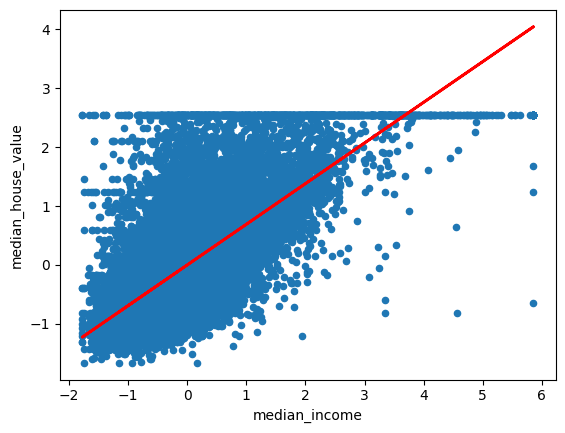

In [70]:
#plot least square line
scaled_df.plot(kind = "scatter", x = "median_income", y = "median_house_value")
plt.plot(x_test_MI, pred, c = "red", linewidth = 2)

#### Hypothesis testing and P values:
using the null hypothesis lets assume there is no relationship between median_income and median_house_value
Lets test this hypothesis. We shall reject the Null Hypothesis if 95% confidence inderval does not include 0

In [71]:
lm = smf.ols(formula = "median_house_value ~ median_income", data = scaled_df).fit()

In [72]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Sun, 11 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:45:07   Log-Likelihood:                -22668.
No. Observations:               20640   AIC:                         4.534e+04
Df Residuals:                   20638   BIC:                         4.536e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.833e-17      0.005   1.55e-14      1.000      -0.010       0.010
median_income     0.6881      0.005    136.223      0.000       0.678       0.698
==============================================================================
Omnibus:                     4245.795   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9273.446
Skew:                           1.191   Prob(JB):                         0.00
Kurtosis:                       5.260   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Insight:
The P value of 0.000 statistically significantly supports the alternative hypothesis. We, therefore reject the null hypothesis and accept the alternative hypothesis which suggests a strong relationship between **median_house_value** and **median_income** variables.